# **Introduction**

> Cricket, a sport with deep-rooted traditions and a global following, stands as one of the most captivating and strategic games in the world. Governed by a set of intricate rules, cricket has evolved into various formats, with international and league competitions capturing the hearts of fans globally. As cricket continues to enthrall enthusiasts, its impact extends beyond the boundaries of the playing field, influencing cultures and fostering a sense of unity among diverse communities.

> In the contemporary landscape of cricket, the advent of data analysis and data science has ushered in a new era, revolutionizing the way teams strategize and players hone their skills. In this context, the present report delves into the realm of data-driven insights derived from ball-by-ball data of both international T20 matches and the immensely popular Indian Premier League (IPL). The focus is on a meticulously crafted data engineering pipeline that downloads, structures, and transforms this raw cricketing data into accessible and analyzable CSV files.

> The overarching question guiding this investigation is: "What methods of dismissal hold significance in both the international format of the game and the league format, specifically the IPL? Do the trends show similarity and what can be inferred from this." This query seeks to unravel the dynamics of player dismissals and their distribution, shedding light on patterns and trends that can inform strategies, influence team compositions, and contribute to a deeper understanding of the game.

> In the following sections, we will explore the construction and significance of the data engineering pipeline, the nuances of data analysis in modern cricket, and the implications of our findings. By bridging the traditional nuances of cricket with the cutting-edge methodologies of data analysis, this report aims to uncover valuable insights into the methods of dismissal, thus adding a data-driven layer to the rich tapestry of cricketing analysis.

# **Methods**

## Data Sources:
> The primary data source for this analysis is "cricsheet.org," a comprehensive collection of projects providing ball-by-ball match data for various cricket formats, including Men’s and Women’s Test Matches, One-day Internationals, Twenty20 Internationals, and numerous league competitions such as the Indian Premier League (IPL). For this study, two specific datasets were acquired—one encompassing international T20 matches from 2003 and another focusing on IPL matches from 2008.

> The JSON structure provides a detailed representation of a cricket match, including match metadata, outcomes, and ball-by-ball information for each inning, capturing essential details such as runs, wickets, and specific events during each delivery. Below is a breakdown of the JSON file structure, explaining relevant fields in detail:


1.   ***match id (String)***: Represents a unique identifier for each cricket match.
2.   ***dates (Array of Strings)***: Contains the date or dates when the cricket match took place. Example: ["2022-01-01"]
3.   ***info (Object)***:Contains metadata and information about the cricket match.
Subfields:
  * ***venue (String)***: Represents the venue where the match was played.
  * ***outcome (Object)***: Contains details about the match outcome. 
  Subfields:
      * ***winner (String)***: Represents the team that won the match.
      * ***target (Object)***: Provides information about the target score set in the match.
      * ***runs (Integer)***: The target runs set for the chasing team.
4.    ***innings (Array of Objects)***: Contains details about each inning of the cricket match. Each object represents an inning, and the array may contain information for multiple innings.
Subfields:
  * ***team (String)***: Represents the team playing the inning.
  * ***runs (Integer)***: Total runs scored by the team in the inning.
  * ***wickets (Integer)***: Total wickets taken by the bowling team.
  * ***overs (Array of Objects)***: Contains information about each over in the inning. 
  Subfields:
      * ***deliveries (Array of Objects)***: Contains information about each delivery in the over. 
      Subfields:
        * ***batter (String)***: Represents the batsman facing the delivery.
        * ***non_striker (String)***: Represents the non-striker batsman.
        * ***bowler (String)***: Represents the bowler delivering the ball.
        * ***runs (Object)***: Contains information about runs scored in the delivery. 
          Subfields:
            * ***batter (Integer)***: Runs scored by the batsman.
            * ***extras (Integer)***: Extra runs scored (e.g., wides, no-balls).
            * ***total (Integer)***: Total runs from the delivery.
        * ***wickets (Array of Objects)***: Contains information about wickets taken in the delivery. 
          Subfields:
            * ***kind (String)***: Type of dismissal (e.g., "bowled," "caught").
            * ***player_out (String)***: Batsman who got out.
            * ***fielders (String)***: Name of the fielder contributing in dismissal.

## Data Engineering Pipeline:
> The data engineering pipeline (corresponding to 'pull_data.py' file in 'project' directory) was designed to transform raw ball-by-ball data into structured CSV files, conducive to detailed analysis. Leveraging the Python programming language and relevant libraries, the pipeline involved the following key steps:

1. **Downloading and Extracting JSON Data**:
  * The code downloads ZIP files containing JSON data for International Twenty over format matches and Indian Premier League matches.
  * It extracts the contents of the ZIP files into respective directories (*t20s_male_json/* and *ipl_json/*).
2. **Data Loading Functions**:
  * Two functions (*load_data_it20* and *load_data_ipl*) are defined to load JSON files into lists.
  * These functions iterate through JSON files, load each file's data, and append it to a list.
  * Match IDs are extracted from filenames and added to the data
3. **Data Processing**:
  * The create_df function processes the loaded data and creates a Pandas DataFrame.
  * It extracts relevant match statistics from the JSON structure, focusing on completed matches with a winner and target score.
  * The DataFrame includes details like match ID, date, venue, teams, innings details, ball-by-ball information, and outcome..
  * Calculates additional features such as runs to target, balls remaining, and whether a chase was successful.
4. **DataFrame Manipulation and Feature Engineering**:
  * Calculations: Calculates additional metrics such as total batter runs, non-striker runs, and bowler runs conceded.
  * Iteration and Aggregation: Iterates over rows to calculate cumulative runs and balls faced for batters and non-strikers.
  * Handling Special Cases: Handles cases where a player gets out, updating final stats and resetting runs and balls faced.
5. **Saving Processed Data as CSV**:
  * CSV File Creation: The processed data for International Twenty over matches and Indian Premier League matches are saved as CSV files (*it20.csv* and *ipl.csv*).

> Overall, the code efficiently downloads, processes, and structures cricket match data into a format suitable for analysis and further use. The resulting CSV files can be used for various analytics and machine learning tasks related to cricket match statistics.

# Reulting Dataset:
> The generated CSV file, named 'ball_by_ball_it20.csv,' is a structured and enriched dataset containing detailed information about International Twenty over format (IT20) cricket matches. Let's break down the columns to understand the data:

1. **Match ID**: Unique identifier for each cricket match.
2. **Date**: Date of the match.
3. **Venue**: Venue where the match took place.
4. **Bat First**: Team batting first in the innings.
5. **Bat Second**: Team batting second in the innings.
6. **Innings**: Inning number (1 or 2).
7. **Over**: Over number in the innings.
8. **Ball**: Ball number in the over.
9. **Batter**: Player facing the ball.
10. **Non Striker**: Non-striker player.
11. **Bowler**: Player bowling the ball.
12. **Batter Runs**: Runs scored by the batter from the ball.
13. **Extra Runs**: Extra runs scored from the ball (e.g., wides, no-balls).
14. **Runs From Ball**: Total runs scored from the ball (including batter runs and extra runs).
15. **Ball Rebowled**: Binary indicator (0 or 1) representing whether the ball had to be rebowled.
16. **Extra Type**: Type of extra runs (e.g., wides, no-balls).
17. **Wicket**: Binary indicator (0 or 1) representing whether a wicket fell in that ball.
18. **Method**: Method of dismissal (if a wicket fell).
19. **Player Out**: Player who got out (if a wicket fell).
20. **Innings Runs**: Total runs scored in the innings.
21. **Innings Wickets**: Total wickets fallen in the innings.
22. **Target Score**: Target score for the team batting second.
23. **Runs to Get**: Runs required to win (relevant for the team batting second).
24. **Balls Remaining**: Number of balls remaining in the innings.
25. **Winner**: Team that won the match.
26. **Chased Successfully**: Binary indicator (0 or 1) representing whether the chasing team won.
27. **Total Batter Runs**: Total runs scored by the batter in the match.
28. **Total Non Striker Runs**: Total runs scored by the non-striker in the match.
29. **Batter Balls Faced**: Number of balls faced by the batter in the match.
30. **Non Striker Balls Faced**: Number of balls faced by the non-striker in the match.
31. **Player Out Runs**: Runs scored by the player who got out (if a wicket fell).
32. **Player Out Balls Faced**: Balls faced by the player who got out (if a wicket fell).
33. **Bowler Runs Conceded**: Runs conceded by the bowler in that ball (including batter runs and extra runs).
34. **Valid Ball**: Binary indicator (0 or 1) representing whether the ball was valid (not rebowled).


> This dataset provides a comprehensive and detailed account of each ball bowled in IT20 matches, enabling in-depth analysis of player performance, match dynamics, and outcomes. The additional calculated features enhance the dataset's richness, offering valuable insights for cricket analytics and research.

## Challenges Encountered:
>In the course of this project, I encountered several challenges that added complexity to the data processing pipeline. One of the primary hurdles was the intricacy of the JSON data. The structure of the data was notably complex, making it challenging to decipher and extract the relevant information efficiently. The nested nature of the JSON objects required meticulous navigation, resulting in a time-consuming and frustrating process to identify and structure the necessary details for our analysis.

>Moreover, the data processing task involved not only extracting existing information but also calculating additional features to enrich our dataset. This process required a considerable amount of effort, as it involved aggregating and computing various statistics and metrics at the granular level of individual deliveries in cricket matches. These calculations were essential for capturing nuanced aspects of the game, such as total runs scored by players, balls faced, and runs conceded by bowlers. Implementing these computations added an extra layer of complexity to the data engineering pipeline, demanding careful attention to detail and thorough testing to ensure the accuracy of the derived features.

>Despite these challenges, overcoming them was crucial to obtaining a comprehensive and meaningful dataset for our analysis. The final dataset not only included basic match information but also featured enriched metrics that provided deeper insights into player performance and match dynamics. While the process was demanding, it underscored the importance of robust data engineering techniques in handling intricate data structures and extracting valuable insights from sports analytics datasets.

# **Results**
> To answer the primary question, "What methods of dismissal hold significance in both the international format of the game and the league format, specifically the IPL? Do the trends show similarity and what can be inferred from this.", we present the distribution of dismissal methods in the International Twenty over format (IT20) matches and league matches separately. The following sections provide a breakdown of the percentage share of each dismissal method in both formats in the form of pie charts.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t20_data = pd.read_csv('it20.csv')
ipl_data = pd.read_csv('ipl.csv')

## International T-20 Results

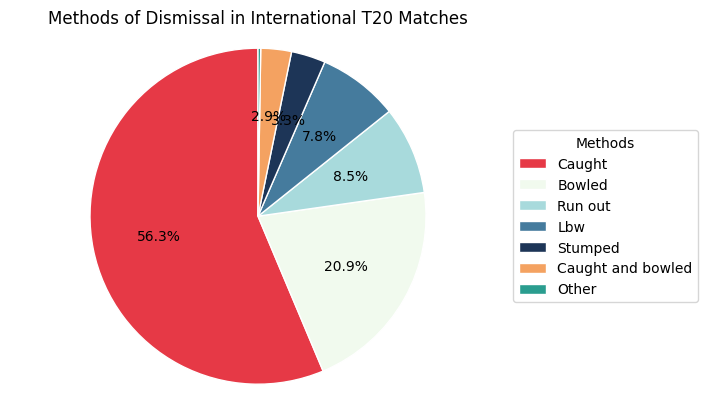

In [8]:
# Filter data frame to get rid of N/A values in the method column
filtered_df = t20_data[t20_data['Method'] != 'N/A']

# Count values in filtered data frame
value_counts = filtered_df['Method'].value_counts()

threshold = 50  # Set the minimum occurrence count for displaying a slice

# Filter out the methods with occurrence count below the threshold
filtered_value_counts = value_counts[value_counts >= threshold]

# Create a custom "Other" category to group rare methods below the threshold
other_count = value_counts[value_counts < threshold].sum()
filtered_value_counts['Other'] = other_count

# Capitalize the first letter of each label using str.capitalize()
labels = filtered_value_counts.index.str.capitalize()

# Define custom colors for the pie chart slices
colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557', '#F4A261', '#2A9D8F']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the pie chart with the filtered value counts, remove percentages < 1%
def autopct_filter(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''

wedges, texts, _ = ax.pie(
    filtered_value_counts,
    labels=None,  # Remove labels for now
    autopct=autopct_filter,  # Customize autopct to filter percentages
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},  # Add white edge color for better visibility
)

# Add a legend with custom labels
ax.legend(labels, title="Methods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set the title
plt.title('Methods of Dismissal in International T20 Matches')

plt.show()

## Indian Premier League Results

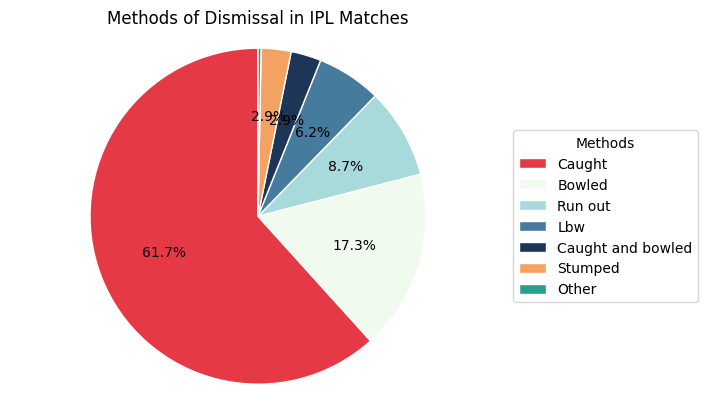

In [6]:
# Filter data frame to get rid of N/A values in the method column
filtered_df = ipl_data[ipl_data['Method'] != 'N/A']

# Count values in filtered data frame
value_counts = filtered_df['Method'].value_counts()

threshold = 50  # Set the minimum occurrence count for displaying a slice

# Filter out the methods with occurrence count below the threshold
filtered_value_counts = value_counts[value_counts >= threshold]

# Create a custom "Other" category to group rare methods below the threshold
other_count = value_counts[value_counts < threshold].sum()
filtered_value_counts['Other'] = other_count

# Capitalize the first letter of each label using str.capitalize()
labels = filtered_value_counts.index.str.capitalize()

# Define custom colors for the pie chart slices
colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557', '#F4A261', '#2A9D8F']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the pie chart with the filtered value counts, remove percentages < 1%
def autopct_filter(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''

wedges, texts, _ = ax.pie(
    filtered_value_counts,
    labels=None,  # Remove labels for now
    autopct=autopct_filter,  # Customize autopct to filter percentages
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},  # Add white edge color for better visibility
)

# Add a legend with custom labels
ax.legend(labels, title="Methods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set the title
plt.title('Methods of Dismissal in IPL Matches')

plt.show()

> These tables provide a clear overview of the distribution of dismissal methods in both International Twenty over matches and league matches. The percentages indicate the relative frequency of each method, offering insights into the patterns of player dismissals in different formats of the game. The data serves as a foundation for further interpretation in the subsequent sections of the report.

# **Discussion/Conclusions**

> The analysis of dismissal methods in International Twenty over Format (IT20) matches and league matches reveals interesting insights into the strategies and dynamics of the game. Here is a breakdown and interpretation of the results:

### International Twenty over Format (IT20) Matches:

1. Caught (56.3%): Being the most common method of dismissal in IT20 matches, it suggests the significance of fielding skills and the ability of players to take catches.
2. Bowled (20.9%): This relatively high percentage indicates the effectiveness of bowlers in getting through the batsmen's defenses, highlighting the importance of accurate and skillful bowling.
3. LBW (7.3%): LBW dismissals contribute significantly, showcasing the role of bowlers in exploiting the leg-before-wicket rule to their advantage.
4. Run Out (8.5%): Run-outs are frequent, emphasizing the importance of quick and strategic fielding in limiting the opposition's scoring opportunities.
5. Stumped (3.3%) and Caught and Bowled (2.9%): These dismissals, while less common, showcase the role of wicketkeepers and the versatility of bowlers who can take catches off their own bowling.

### League Format Matches:
1. Caught (61.7%): Similar to IT20 matches, catching remains the predominant method of dismissal in league matches, indicating its universal importance across formats.
2. Bowled (17.3%): Bowled dismissals maintain a notable percentage, emphasizing the significance of bowler skill and tactics in league games as well.
3. LBW (6.2%): While a slightly lower percentage, LBW dismissals still play a crucial role, indicating the continued importance of bowlers targeting the stumps.
4. Run Out (8.7%): Run-outs are slightly more frequent in league matches, but not a significant difference.

## Comparative Analysis & Implications for In-Game Tactics:
* The commonality in the top dismissal methods between IT20 and league matches underscores the consistency of certain strategies across different formats.
* Teams in both IT20 and league matches should prioritize fielding skills, especially catching, given its dominant role in dismissals.
* Bowlers who excel in getting batsmen out through bowled and LBW dismissals can be considered valuable assets in both formats.
* Strategies around run-outs could be adapted based on the format, with teams in longer league matches having more opportunities to create and execute run-out chances.

## Outlook to Future Work:
> The data engineering pipeline provides a reliable and efficient means of generating up-to-date datasets for analysis and machine learning tasks.
Future work could involve implementing target and chase predictors using machine learning algorithms to enhance strategic decision-making during matches.
Advanced statistics could be calculated to analyze player performance from different perspectives, contributing to a deeper understanding of player dynamics in the game.